# Data Science Capstone - Collisions Assessment Methodology

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

### 1. Introduction <a name="introduction"></a>

This notebook will describe the methodology to assess collisions data obtained from Seattle city, wich are data provided by SPD and recorded by traffic records, including all types of collisions, displayed at the intersection or mid-bloc of a segment, since 2004.

The problem consists in correctly assess a driver that wants to know the probability of get involved in an accident, based on weather conditions, road conditions and the previous history of that highway/road segment, allowing him to drive more carefully or even change course if needed.

The goal of this work is to analyze data in order to provide a model that will predict the severity of an accident/collision, given a number of features that will be extracted from the data. The model will classify and predict severity, so a driver can use this model to change course or drive more carefully, given that he isn't want to get involved into an accident, since the consequences can be unpredictable.



### 2. Data description <a name="data"></a>

2.1 Imports needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(10,6)})
%matplotlib inline

2.2 Exploratory data analysis

In [2]:
raw = pd.read_csv('Data-Collisions.csv')

C:\Python\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Drop unmatched collisions, 2,5% of rows
raw.drop(raw[raw['STATUS']!='Matched'].index, inplace = True)

In [4]:
# Discarding non critical data 
raw.drop(columns=['INCKEY','INTKEY','COLDETKEY','INATTENTIONIND','LOCATION'],inplace=True)
raw.drop(columns=['ST_COLCODE','PERSONCOUNT', 'PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','OBJECTID'], inplace=True)
raw.drop(columns=['REPORTNO','PEDROWNOTGRNT','HITPARKEDCAR','SEGLANEKEY','CROSSWALKKEY'],inplace=True)
raw.drop(columns=['SEVERITYDESC','COLLISIONTYPE','JUNCTIONTYPE','ST_COLDESC','SEVERITYCODE.1'], inplace=True)
raw.drop(columns=['STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC','SDOTCOLNUM','UNDERINFL','SPEEDING'], inplace=True)

In [5]:
# Dropping where lat or long is null
raw.drop(raw[raw['X'].isnull()].index, inplace=True)

In [6]:
# Nan replacement
raw['WEATHER'].fillna('Other', inplace=True)
raw['ROADCOND'].fillna('Other', inplace=True)
raw['LIGHTCOND'].fillna('Other', inplace=True)
raw['SDOT_COLCODE'].fillna(0, inplace=True)

In [7]:
# Data conversions
raw['SDOT_COLCODE'] = pd.to_numeric(raw['SDOT_COLCODE'])
raw['INCDATE'] = pd.to_datetime(raw['INCDATE'])
raw['INCDTTM'] = pd.to_datetime(raw['INCDTTM'])
raw['WEEKDAY'] = raw['INCDATE'].apply(lambda x: x.weekday())
raw.drop(columns=['INCDATE'],inplace=True)

raw['INCDTTM'] = (raw['INCDTTM'].dt.hour % 24 + 4) // 4
raw['INCDTTM'].replace({1: 'Late Night',
                      2: 'Early Morning',
                      3: 'Morning',
                      4: 'Noon',
                      5: 'Evening',
                      6: 'Night'}, inplace=True)

In [8]:
# Converting 'Unknown' to 'Other' 
raw['WEATHER'].replace(to_replace='Unknown',value='Other', inplace=True)
raw['ROADCOND'].replace(to_replace='Unknown',value='Other', inplace=True)
raw['LIGHTCOND'].replace(to_replace='Unknown',value='Other', inplace=True)

In [9]:
# Dropping Other data to reduce noise
#lightcond = raw[raw['LIGHTCOND']=='Other'].index
#raw.drop(lightcond, inplace=True)
#weathercond = raw[raw['WEATHER']=='Other'].index
#raw.drop(weathercond, inplace=True)
#roadcond = raw[raw['ROADCOND']=='Other'].index
#raw.drop(roadcond, inplace=True)

In [10]:
raw['WEATHER'].replace(to_replace='Unknown',value='Other', inplace=True)

In [11]:
# Dealing with weather conditions that are less frequent
raw['WEATHER'].replace(to_replace='Sleet/Hail/Freezing Rain',value='Raining', inplace=True)
raw['WEATHER'].replace(to_replace='Sleet/Hail/Freezing Rain',value='Raining', inplace=True)
raw['WEATHER'].replace(to_replace='Blowing Sand/Dirt',value='Other', inplace=True)
raw['WEATHER'].replace(to_replace='Severe Crosswind',value='Other', inplace=True)
raw['WEATHER'].replace(to_replace='Partly Cloudy',value='Other', inplace=True)

# Dealing with road conditions that are less frequent
raw['ROADCOND'].replace(to_replace='Ice',value='Ice/Snow', inplace=True)
raw['ROADCOND'].replace(to_replace='Snow/Slush',value='Ice/Snow', inplace=True)
raw['ROADCOND'].replace(to_replace='Standing Water',value='Wet', inplace=True)
raw['ROADCOND'].replace(to_replace='Sand/Mud/Dirt',value='Other', inplace=True)
raw['ROADCOND'].replace(to_replace='Oil',value='Other', inplace=True)

# Dealing with light conditions that are less frequent
raw['LIGHTCOND'].replace(to_replace='Dark - Street Lights On',value='Dark', inplace=True)
raw['LIGHTCOND'].replace(to_replace='Dark - No Street Lights',value='Dark', inplace=True)
raw['LIGHTCOND'].replace(to_replace='Dark - Street Lights Off',value='Dark', inplace=True)
raw['LIGHTCOND'].replace(to_replace='Dark - Unknown Lighting',value='Dark', inplace=True)

In [12]:
# Dealing with ST COLCODE 
raw['SDOT_COLCODE'].replace(to_replace=0,value='Not Applicable', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=[11,12,13,14,15,16,17],value='Vehicle-Vehicle', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=[18,21,22,23,51,52,53,54,55,56,58],value='Vehicle-Pedalcyclist', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=24,value='Vehicle-Pedestrian', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=25,value='Vehicle-Train', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=26,value='Vehicle-object', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=27,value='Ran off road', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=28,value='Ran off road-collided', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=29,value='Overturned', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=[31,32,33,34,35,36,44,46,47,48],value='Driverless', inplace=True)
raw['SDOT_COLCODE'].replace(to_replace=[61,64,66,68,69],value='Pedalcyclist involved', inplace=True)

In [13]:
raw.drop(columns=['SDOT_COLDESC'],inplace=True)

In [14]:
collisions = pd.DataFrame(raw)

In [15]:
collisions.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDTTM,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,WEEKDAY
0,2,-122.323148,47.703140,Intersection,Noon,Vehicle-Vehicle,Overcast,Wet,Daylight,2
1,1,-122.347294,47.647172,Block,Evening,Vehicle-Vehicle,Raining,Wet,Dark,2
2,1,-122.334540,47.607871,Block,Morning,Vehicle-Vehicle,Overcast,Dry,Daylight,3
3,1,-122.334803,47.604803,Block,Morning,Vehicle-Vehicle,Clear,Dry,Daylight,4
4,2,-122.306426,47.545739,Intersection,Morning,Vehicle-Vehicle,Raining,Wet,Daylight,2


### 3. Methodology <a name="methodology"></a>

3.1 Explore data

In [16]:
perc_weather = pd.DataFrame(collisions['WEATHER'].value_counts()/len(collisions)*100)
perc_weather

,WEATHER
Clear,59.024057
Raining,17.402939
Overcast,14.699812
Other,8.089339
Snowing,0.484288
Fog/Smog/Smoke,0.299565


We can see that a large number of collisions occurs at Daylight, Dry roads, at mid road and at intersections and with clear weather.

In [17]:
perc_roadcond = pd.DataFrame(collisions['ROADCOND'].value_counts()/len(collisions)*100)
perc_roadcond

,ROADCOND
Dry,66.129653
Wet,25.007990
Other,7.689016
Ice/Snow,1.173341


We see that dry weather condition is more favorable to collisions

In [18]:
perc_lightcond = pd.DataFrame(collisions['LIGHTCOND'].value_counts()/len(collisions)*100)
perc_lightcond

,LIGHTCOND
Daylight,61.528377
Dark,27.045899
Other,6.985336
Dusk,3.128369
Dawn,1.312019


We see that daylight conditions are more favorable to collisions

In [19]:
perc_weekday = pd.DataFrame(collisions['WEEKDAY'].value_counts()/len(collisions)*100)
perc_weekday.reset_index(inplace=True)
perc_weekday.replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}, inplace=True)
perc_weekday.set_index('index',inplace=True)

<AxesSubplot:xlabel='index'>

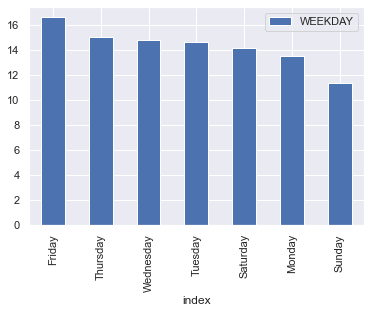

In [20]:
perc_weekday.plot(kind='bar')

Collisions occurr randomly over week days, although collisions on friday, thursday and wednesday are more frequent. Collisions on sunday are less frequent due to less traffic volume.

<AxesSubplot:>

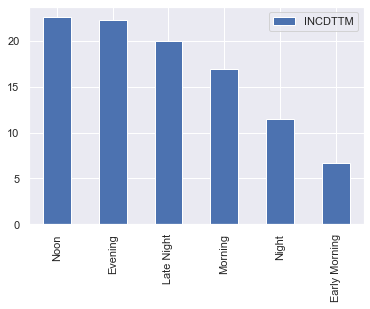

In [23]:
perc_dayperiod = pd.DataFrame(collisions['INCDTTM'].value_counts()/len(collisions)*100)
perc_dayperiod.plot(kind='bar')

Collisions occur more frequently at noon and evening.

In [24]:
perc_stcolcode = pd.DataFrame(collisions['SDOT_COLCODE'].value_counts()/len(collisions)*100)
perc_stcolcode.head(20)

,SDOT_COLCODE
Vehicle-Vehicle,82.715153
Ran off road-collided,4.631611
Not Applicable,3.627283
Vehicle-Pedestrian,3.444185
Vehicle-Pedalcyclist,2.708544
Vehicle-object,2.180378
Overturned,0.247561
Driverless,0.207474
Pedalcyclist involved,0.095882
Ran off road,0.087215


We see that the great majority of collisions are between vehicles.

In [25]:
road_weather = collisions.pivot_table(index='ROADCOND',columns='WEATHER',values='SEVERITYCODE',aggfunc='count',fill_value=0)

<AxesSubplot:xlabel='WEATHER', ylabel='ROADCOND'>

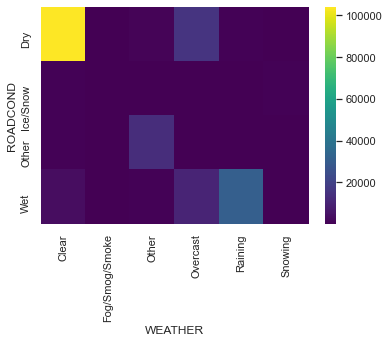

In [26]:
sns.heatmap(road_weather,cmap='viridis')

We see that Clear weather, overcast and raining are predominant factors that can cause severe accidents at dry and wet roads.

In [27]:
light_weather = collisions.pivot_table(index='LIGHTCOND',columns='WEATHER',values='SEVERITYCODE',aggfunc='count',fill_value=0)

<AxesSubplot:xlabel='WEATHER', ylabel='LIGHTCOND'>

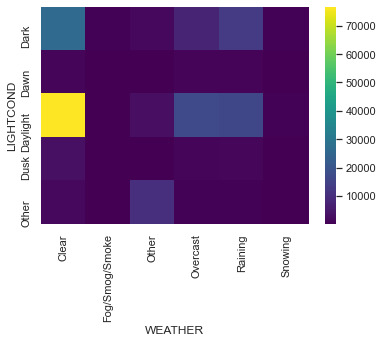

In [28]:
sns.heatmap(light_weather,cmap='viridis')

<AxesSubplot:xlabel='LIGHTCOND,SEVERITYCODE'>

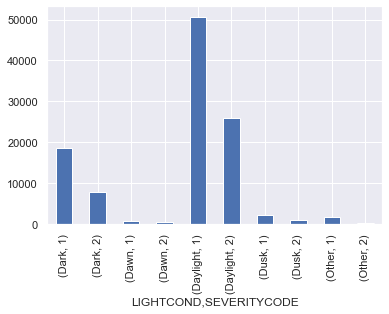

In [29]:
collisions[collisions['WEATHER']=='Clear'].groupby('LIGHTCOND')['SEVERITYCODE'].value_counts().plot(kind='bar')

Exploring collisions only at Clear weather, we see that light conditions that causes severe accidents are daylight and dark streets.

<AxesSubplot:xlabel='ROADCOND,SEVERITYCODE'>

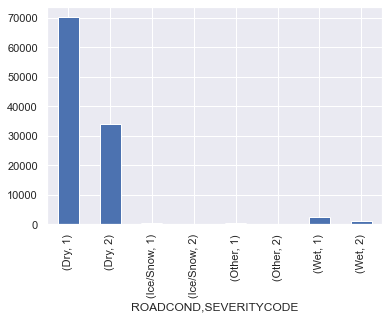

In [30]:
collisions[collisions['WEATHER']=='Clear'].groupby('ROADCOND')['SEVERITYCODE'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='ADDRTYPE'>

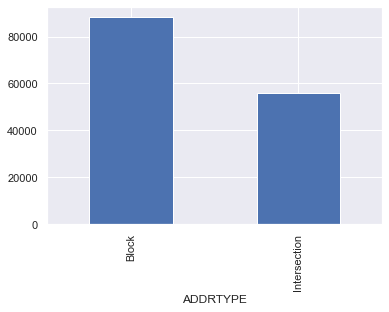

In [31]:
collisions[collisions['WEATHER']=='Clear'].groupby('ADDRTYPE')['SEVERITYCODE'].sum().plot(kind='bar')

<AxesSubplot:xlabel='ADDRTYPE,SEVERITYCODE'>

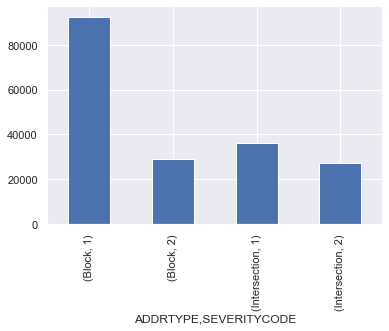

In [32]:
collisions.groupby('ADDRTYPE')['SEVERITYCODE'].value_counts().plot(kind='bar')

Severe collisions are more common in block address types.

<AxesSubplot:xlabel='WEEKDAY,SEVERITYCODE'>

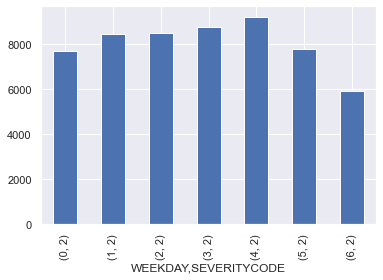

In [33]:
collisions[collisions['SEVERITYCODE']==2].groupby('WEEKDAY')['SEVERITYCODE'].value_counts().plot(kind='bar')

Considering all weather conditions, we see that friday is more risky to drive, with collision severity equal to 2.

3.2 Define features

In [34]:
collisions.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'INCDTTM', 'SDOT_COLCODE',
       'WEATHER', 'ROADCOND', 'LIGHTCOND', 'WEEKDAY'],
      dtype='object')

Given that we know week day, weather conditions, address type, road conditions, light conditions, speeding and under influence of alcohol,
**predict**
severity scale 
of an accident, if occurs, and determines if is more prudent change course or not drive to final destination.

3.3 Modelling

We will use classification and regression models to compare performance, choose the best model and predict severity, based upon features described earlier. If severity is greater then a threshold, the driver will be informed to not drive to final destination, if the severity is intermediate, the driver will be informed to change course. Otherwise, the driver may proceed to final destination.

3.4 Evaluation

We will compare the historic data and use test train split method to create a test set and a train set, in order to be able to
correctly predict the severity, therefore, this will be a supervised learning problem.

### 4. Analysis <a name="analysis"></a>

4.1 Imports needed

In [35]:
from sklearn import preprocessing
import itertools

4.2 Preprocessing

In [36]:
collisions.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INCDTTM,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,WEEKDAY
0,2,-122.323148,47.703140,Intersection,Noon,Vehicle-Vehicle,Overcast,Wet,Daylight,2
1,1,-122.347294,47.647172,Block,Evening,Vehicle-Vehicle,Raining,Wet,Dark,2
2,1,-122.334540,47.607871,Block,Morning,Vehicle-Vehicle,Overcast,Dry,Daylight,3
3,1,-122.334803,47.604803,Block,Morning,Vehicle-Vehicle,Clear,Dry,Daylight,4
4,2,-122.306426,47.545739,Intersection,Morning,Vehicle-Vehicle,Raining,Wet,Daylight,2


In [37]:
collisions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184601 entries, 0 to 194672
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   SEVERITYCODE  184601 non-null  int64  
 1   X             184601 non-null  float64
 2   Y             184601 non-null  float64
 3   ADDRTYPE      184601 non-null  object 
 4   INCDTTM       184601 non-null  object 
 5   SDOT_COLCODE  184601 non-null  object 
 6   WEATHER       184601 non-null  object 
 7   ROADCOND      184601 non-null  object 
 8   LIGHTCOND     184601 non-null  object 
 9   WEEKDAY       184601 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 15.5+ MB


In [38]:
Feature = collisions[['ADDRTYPE','INCDTTM','SDOT_COLCODE','WEATHER','ROADCOND','LIGHTCOND','WEEKDAY']]

In [39]:
Feature = pd.concat([Feature,pd.get_dummies(collisions['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(collisions['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(collisions['LIGHTCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(collisions['ADDRTYPE'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(collisions['INCDTTM'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(collisions['SDOT_COLCODE'])], axis=1)

In [40]:
Feature.head()

,ADDRTYPE,INCDTTM,SDOT_COLCODE,WEATHER,ROADCOND,LIGHTCOND,WEEKDAY,Clear,Fog/Smog/Smoke,Other,...,Not Applicable,Overturned,Pedalcyclist involved,Ran off road,Ran off road-collided,Vehicle-Pedalcyclist,Vehicle-Pedestrian,Vehicle-Train,Vehicle-Vehicle,Vehicle-object
0,Intersection,Noon,Vehicle-Vehicle,Overcast,Wet,Daylight,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,Block,Evening,Vehicle-Vehicle,Raining,Wet,Dark,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,Block,Morning,Vehicle-Vehicle,Overcast,Dry,Daylight,3,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,Block,Morning,Vehicle-Vehicle,Clear,Dry,Daylight,4,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,Intersection,Morning,Vehicle-Vehicle,Raining,Wet,Daylight,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [41]:
X = Feature.drop(columns=['ADDRTYPE','INCDTTM','SDOT_COLCODE','WEATHER','ROADCOND','LIGHTCOND'])

In [42]:
X.columns

Index(['WEEKDAY', 'Clear', 'Fog/Smog/Smoke', 'Other', 'Overcast', 'Raining',
       'Snowing', 'Dry', 'Ice/Snow', 'Other', 'Wet', 'Dark', 'Dawn',
       'Daylight', 'Dusk', 'Other', 'Block', 'Intersection', 'Early Morning',
       'Evening', 'Late Night', 'Morning', 'Night', 'Noon', 'Driverless',
       'Not Applicable', 'Overturned', 'Pedalcyclist involved', 'Ran off road',
       'Ran off road-collided', 'Vehicle-Pedalcyclist', 'Vehicle-Pedestrian',
       'Vehicle-Train', 'Vehicle-Vehicle', 'Vehicle-object'],
      dtype='object')

In [43]:
y = collisions['SEVERITYCODE'].values

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [44]:
X = preprocessing.StandardScaler().fit(X).transform(X)

In [45]:
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

Defining test, train sets

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (129220, 35) (129220,)
Test set: (55381, 35) (55381,)


4.3 Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
depth_range = range(1, 15)
jaccard_score_ = []
f1_score_ = []

for d in depth_range:
    dt = DecisionTreeClassifier(criterion = 'gini', max_depth = d)
    dt.fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    jaccard_score_.append(jaccard_score(y_test, dt_yhat))
    f1_score_.append(f1_score(y_test, dt_yhat, average = 'weighted'))

In [52]:
result = pd.DataFrame([jaccard_score_, f1_score_], index = ['Jaccard', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7','d = 8','d = 9','d = 10', 'd = 11', 'd = 12', 'd = 13', 'd = 14'])
result.columns.name = 'Evaluation Metrics'
result

Evaluation Metrics,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8,d = 9,d = 10,d = 11,d = 12,d = 13,d = 14
Jaccard,0.715824,0.730155,0.730155,0.729993,0.729993,0.730645,0.731282,0.731298,0.731112,0.730802,0.730540,0.730427,0.730073,0.729787
F1,0.637207,0.679263,0.679263,0.678860,0.678860,0.680868,0.682677,0.682622,0.682469,0.681857,0.681322,0.681155,0.680378,0.680419


In [53]:
dtree = DecisionTreeClassifier(criterion="entropy", max_depth = 8)

In [54]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8)

4.4 Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

In [48]:
solvers = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularization_val = [0.1, 0.01, 0.001]
iterations = 0
accuracy_score = []

resume = {}

for i, c in enumerate(regularization_val):
    for j, solver in enumerate(solvers):
        iterations += 1
        lr_model = LogisticRegression(C = c, solver = solver).fit(X_train, y_train)
        lr_yhat = lr_model.predict(X_train)
        y_prob = lr_model.predict_proba(X_train)
        resume['Test number {}'.format(iterations)] = ['Accuracy is = {}'.format(c), solver, log_loss(y_train, y_prob)]
        accuracy_score.append(log_loss(y_train, y_prob))

In [49]:
result_log = pd.DataFrame(resume)
result_log

,Test number 1,Test number 2,Test number 3,Test number 4,Test number 5,Test number 6,Test number 7,Test number 8,Test number 9,Test number 10,Test number 11,Test number 12,Test number 13,Test number 14,Test number 15
0,Accuracy is = 0.1,Accuracy is = 0.1,Accuracy is = 0.1,Accuracy is = 0.1,Accuracy is = 0.1,Accuracy is = 0.01,Accuracy is = 0.01,Accuracy is = 0.01,Accuracy is = 0.01,Accuracy is = 0.01,Accuracy is = 0.001,Accuracy is = 0.001,Accuracy is = 0.001,Accuracy is = 0.001,Accuracy is = 0.001
1,lbfgs,saga,liblinear,newton-cg,sag,lbfgs,saga,liblinear,newton-cg,sag,lbfgs,saga,liblinear,newton-cg,sag
2,0.535736,0.535736,0.535736,0.535736,0.535736,0.535738,0.535738,0.53574,0.535738,0.535738,0.535885,0.535885,0.536072,0.535885,0.535885


In [55]:
lr_model = LogisticRegression(C = 0.001, solver = 'saga')
lr_model.fit(X_train, y_train)
lr_model

LogisticRegression(C=0.001, solver='saga')

### 5. Results and Discussions <a name="results"></a>

5.1 Comparison of models

In [56]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

5.2 Model selection

In [62]:
# Jaccard

# Decision Tree
dt_yhat = dtree.predict(X_test)
jss1 = round(jaccard_score(y_test, dt_yhat), 4)

# Logistic Regression
lr_yhat = lr_model.predict(X_test)
jss2 = round(jaccard_score(y_test, lr_yhat), 4)

jss_list = [jss1, jss2]
jss_list

[0.7315, 0.7316]

In [63]:
# F1_score

# Decision Tree
dt_yhat = dtree.predict(X_test)
f1 = round(f1_score(y_test, dt_yhat, average = 'weighted'), 4)

# Logistic Regression
lr_yhat = lr_model.predict(X_test)
f2 = round(f1_score(y_test, lr_yhat, average = 'weighted'), 4)

f1_list = [f1, f2]
f1_list

[0.6834, 0.6835]

In [65]:
# log loss

# Logistic Regression
lr_prob = lr_model.predict_proba(X_test)
ll_list = ['NA', round(log_loss(y_test, lr_prob), 4)]
ll_list

['NA', 0.5352]

In [66]:
columns = ['Decision Tree', 'Logistic Regression']
index = ['Jaccard', 'F1-score', 'Logloss']
final_report = pd.DataFrame([jss_list, f1_list, ll_list], index = index, columns = columns)
final_report = final_report.transpose()
final_report.columns.name = 'Algorithm'

In [67]:
final_report

Algorithm,Jaccard,F1-score,Logloss
Decision Tree,0.7315,0.6834,NA
Logistic Regression,0.7316,0.6835,0.5352


### 6. Conclusions <a name="conclusion"></a>

We see that the best algorithm to make predictions, without a real test set, is logistic regression with saga solver and C = 0.001, although may be almost equivalent to decision tree model with depth equal to 8.

Yet will be evaluated if is necessary aggregating more categorical variables, like SDOT_COLCODE to only two classes and analyze performance, same question to weather conditions and light conditions.

We don't use KNN model and SVM due to long time processing of these models.